# Text2vec-base-multilingual

In [1]:
#!pip install ktrain

In [2]:
#!pip install sentence_transformers

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import ktrain
from ktrain import text

data_set = pd.read_csv(r"C:\Users\volpe\Documents\MARCO\0.master\0.Corsi\Machine_learning\Carman_google_drive\TextMining\data_0905_semicolon.csv",sep=";")

c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


https://huggingface.co/shibing624/text2vec-base-multilingual

In [2]:
data_set.head()

,Unnamed: 0,Ticker,Titles,Date,Var_prc,Target
0,0,MMM,<title>Here is What to Know Beyond Why 3M Comp...,0,0.008478,0.0
1,69,MMM,<title>What's Next For 3M Stock After A 15% Fa...,0,0.008478,0.0
2,68,MMM,<title>MMM Stock Quote Price and Forecast - CN...,0,0.008478,0.0
3,67,MMM,<title>3M Announces Upcoming Investor Event - ...,0,0.008478,0.0
4,66,MMM,<title>Open Door: Claire Pentecost + Beth Jaco...,0,0.008478,0.0


In [3]:
# we want a input dataframe where there is only a row for each ticker, 10 columns with the 10 titles, and the target
number_articles = 10
col =["Ticker"] + [ "Article " + str(i+1)  for i in range(number_articles)] + ["Target"]
input_df = pd.DataFrame(columns=col)

for ticker in data_set["Ticker"].unique():
    #extract the rows corresponfing to the ticker
    ticker_df = data_set[ data_set["Ticker"] ==  ticker ]
    #create the new row to append to the dataset
    articles_list = ticker_df["Titles"].to_list()
    ticker_target = ticker_df["Target"].iloc[0]
    new_row = [ticker] + articles_list + [ticker_target] 
    #append the new row to the dataset
    input_df = input_df.append(pd.Series(new_row, index=col),ignore_index=True)
input_df = input_df.dropna()
input_df = input_df.reset_index(drop=True)    
print(input_df.shape)
input_df.iloc[60:63,:]

(498, 12)


,Ticker,Article 1,Article 2,Article 3,Article 4,Article 5,Article 6,Article 7,Article 8,Article 9,Article 10,Target
60,BAX,<title>Biden is tweaking an asylum rule to spe...,<title>Baxter's (BAX) Latest FDA Approval to B...,<title>Mayor Sarno Joined with Bax and Nagle t...,"<title>Based On Its ROE, Is Baxter Internation...",<title>(01/02/24) Top Picks 2024: Baxter Inter...,"<title>Baxter (BAX) Beats on Q3 Earnings, Dive...",<title>Is Baxter International (BAX) Too Good ...,<title>Baxter International Inc.'s (NYSE:BAX) ...,<title>Author Correction: Bax Inhibitor-1 regu...,<title>Estimating The Fair Value Of Baxter Int...,-1.0
61,BDX,"<title>When the Price of (BDX) Talks, People L...","<title>Becton, Dickinson and Company (NYSE:BDX...",<title>Beyond the Balance Sheet: What SWOT Rev...,<title>Becton Dickinson (BDX) Surpasses Q3 Ear...,<title>Breaking: BDx Indonesia to acquire Indo...,<title>BD Increases Access to Cutting-Edge Ima...,<title>Investors Still Waiting For A Pull Back...,<title>BDx acquires data center freehold in Si...,<title>BDX Droids Coming to Star Wars Galaxy's...,<title>Why Becton Dickinson (BDX) is a Top Val...,-1.0
63,BBY,<title>Best Buy (NYSE:BBY) PT Lowered to $67.0...,<title>Best Buy (BBY) Up 11.1% Since Last Earn...,<title>Best Buy Reports Q4 FY24 Results - Best...,<title>Decoding Best Buy Co Inc (BBY): A Strat...,<title>Should You Think About Buying Best Buy ...,<title>This Insider Has Just Sold Shares In Be...,<title>Best Buy Geek Squad employees report ma...,<title>Best Buy Recalls Insignia® Air Fryers a...,"<title>Down 15% This Year, Where Is Best Buy S...",<title>Dividend Investors: Don't Be Too Quick ...,0.0


In [4]:
# Cleaning the columns and creating the input for the multilingual bert
for i in range(1, 11):
    column_name = f'Article {i}'
    input_df[column_name] = input_df[column_name].str.replace('<title>', '').str.replace('</title>', '')

input_df["Concatenated Titles"] = input_df.iloc[:, 1:11].apply(lambda row: ' '.join(row), axis=1)
input_df.dropna(axis = 0)
# Print the resulting DataFrame
input_df.iloc[50:53,:]

,Ticker,Article 1,Article 2,Article 3,Article 4,Article 5,Article 6,Article 7,Article 8,Article 9,Article 10,Target,Concatenated Titles
50,ADP,Ep. 539 - Analyzing the New Post-Draft Startup...,ADP Increases Cash Dividend; Marks 49th Consec...,Why Is Software Megacap ADP's Stock Trading Hi...,The Biggest ADP Fallers: How long Gerrit Cole ...,ADP Ventures | Creating a better world of work...,"Private payrolls rose by 140,000 in February, ...",ADP Reimagines the Human Capital Management Cl...,ADP: Employers Added 103000 Workers in Novembe...,ADP Declares Regular Quarterly Dividend - PR N...,ADP vs Paychex: Which Payroll Software is Bett...,0.0,Ep. 539 - Analyzing the New Post-Draft Startup...
51,AZO,(AZO) Investment Report - Stock Traders Daily,Light-tuned selective photosynthesis of azo- a...,Optimal of black anti-static AZO/Al2O3-SiO2-Vx...,"New azo-azomethine derivatives: Synthesis, cha...",NLO azo compounds with sulfonamide groups: A t...,Self-organized patterning on azo molecular gla...,"Synthesis, spectroscopic characterization and ...",Protocol for photoelectrocatalytic synthesis o...,Easily accessible and tunable porous organic p...,"Reversal in solvatochromism, photochromism and...",0.0,(AZO) Investment Report - Stock Traders Daily ...
52,AVB,Decoding AvalonBay Communities Inc (AVB): A St...,'Massive arguments' - AVB reveals Tottenham re...,Van der Vaart calls AVB 'an idiot' and explain...,10 Ways to Use AVB ('Already Vaped Bud') Marij...,Ruben Amorim to Liverpool: Will he become a Mo...,AVIATION LOGISTICS SUPPORT IN THE INDO-PACIFIC...,6 Easy Ways for Getting High Again with Your A...,‘This is really uncomfortable’ – John Terry an...,InfoComm 2023: DiGiCo Introduces Milan-Certifi...,Analysts See Upside On These 3 REITs - AvalonB...,0.0,Decoding AvalonBay Communities Inc (AVB): A St...


In [5]:
from sklearn.model_selection import train_test_split

X = input_df.filter(["Concatenated Titles"],axis=1)
Y = input_df.filter(["Target"],axis=1)
#print(Y)

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

### Here starts the model training

In [6]:
model_name = 'shibing624/text2vec-base-multilingual'
transformer = text.Transformer(model_name, maxlen=512, class_names= np.array([0,1,2]))
y_train = y_train + 1          # classes need to start from
y_test = y_test + 1

c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\volpe\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [7]:
processed_train = transformer.preprocess_train(list(x_train["Concatenated Titles"]), list(y_train["Target"]))
processed_test = transformer.preprocess_test(list(x_test["Concatenated Titles"]), list(y_test["Target"]))

preprocessing train...
language: en
train sequence lengths:
	mean : 137
	95percentile : 160
	99percentile : 174


c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\ktrain\utils.py:769: UserWarning: class_names implies classification but targets array contains float(s) instead of integers or strings
  "class_names implies classification but targets array contains float(s) instead of integers or strings"


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 137
	95percentile : 164
	99percentile : 169


In [8]:
model = transformer.get_classifier()
batch_size = 5                        #small training dataset
learner = ktrain.get_learner(model, train_data=processed_train, val_data=processed_test, batch_size=batch_size)

In [9]:
print(processed_train.y)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


simulating training for different learning rates... this may take a few moments...
79/79 [==============================] - 566s 7s/step - loss: 21.8572 - accuracy: 0.4462


done.
Visually inspect loss plot and select learning rate associated with falling loss


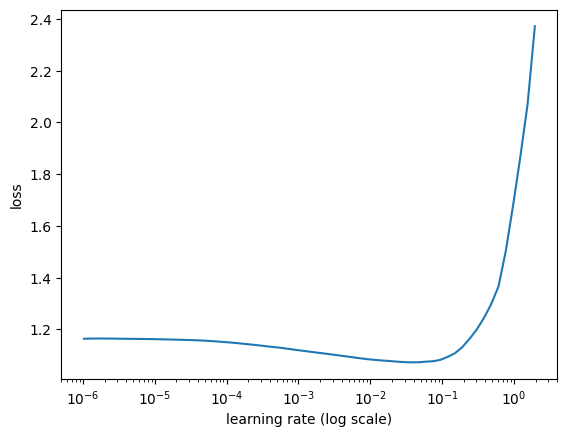

In [10]:
learner.lr_find(show_plot=True,  max_epochs=1)

In [12]:
learner.fit_onecycle(1e-3, 2)



begin training using onecycle policy with max lr of 0.001...
Epoch 1/2
80/80 [==============================] - 596s 7s/step - loss: 2.2749 - accuracy: 0.6533 - val_loss: 1.1388 - val_accuracy: 0.5900
Epoch 2/2
80/80 [==============================] - 630s 8s/step - loss: 1.0524 - accuracy: 0.6382 - val_loss: 1.0271 - val_accuracy: 0.5900


In [13]:
learner.validate(class_names=transformer.get_classes())

4/4 [==============================] - 22s 4s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.59      1.00      0.74        59
           2       0.00      0.00      0.00        18

    accuracy                           0.59       100
   macro avg       0.20      0.33      0.25       100
weighted avg       0.35      0.59      0.44       100



c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0, 23,  0],
       [ 0, 59,  0],
       [ 0, 18,  0]], dtype=int64)

In [14]:
'''
# let's see some predictions
'''
predictor = ktrain.get_predictor(learner.model, preproc=transformer)
import random as rand
i = rand.randint(0,100)

print(input_df["Ticker"].iloc[i],"\n",\
      "Prediction: \n",\
      predictor.predict(x_test["Concatenated Titles"].iloc[i]),\
      "\nTarget: \n",\
      y_train["Target"].iloc[i])

COF 
 Prediction: 
 1 
Target: 
 2.0


### Let's try Doc2vect + NN

In [42]:
from sklearn.model_selection import train_test_split
from sentence_transformers import SentenceTransformer

m = SentenceTransformer("shibing624/text2vec-base-multilingual")

X_df = input_df.filter(["Concatenated Titles"],axis=1)
Y_df = input_df.filter(["Target"],axis=1)
#print(Y_df)

In [43]:
input_df.index[497]

497

In [45]:
c = len(m.encode("I love embeddings!"))                   # dim embedding
r = input_df.shape[0] # dim dataset

input_df = input_df.reset_index(drop=True)
X = np.array([ [0]*c   ] *  r)
for idx,row in input_df.iterrows():
  sentence_embeddings = m.encode(row["Concatenated Titles"])
  X[idx,:] = sentence_embeddings


In [46]:
t_size = 0.2

x_train, x_test, y_train, y_test = train_test_split( X, Y_df, test_size=t_size, random_state=42)

In [47]:
y_train = y_train + 1           # we need classes from 0 to 2
y_test = y_test + 1
#processed_train = transformer.preprocess_train(x_train, list(y_train["Target"]))
#processed_test = transformer.preprocess_test(x_train, list(y_test["Target"]))

In [48]:
len(X[0,:])
print(len(y_train),"---",y_train["Target"].iloc[2])
print(type(y_train))
for i in range(0,len(y_train)):
  pass
  #print(y_train["Target"].iloc[i])

398 --- 1.0
<class 'pandas.core.frame.DataFrame'>


In [49]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, RMSprop, SGD, Adagrad

In [52]:
#to train the NN we need to convert integer output to binary array
num_classes = 3

y_train_dummy = np.zeros((len(y_train), num_classes))
for i in range(0,len(y_train)):
    class_idx = round(y_train["Target"].iloc[i])  
    y_train_dummy[i, class_idx] = 1


y_test_dummy = np.zeros((len(y_test), num_classes))
for i in range(0,len(y_test)):
  y_test_dummy[i,round(y_test["Target"].iloc[i])] = 1


In [278]:
model=Sequential()
model.add(Dense(units=900, activation='relu', input_dim=384))
model.add(Dense(units=300, activation='tanh'))
model.add(Dense(units=3, activation='sigmoid'))    #output layer
model.compile(loss='mse',
              optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999))

model.fit(x_train,y_train,epochs=200,batch_size=10)  #10, 5 


pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

Epoch 1/200


c:\Users\volpe\anaconda3\envs\kt\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


40/40 [==============================] - 0s 3ms/step - loss: 0.4912
Epoch 2/200
40/40 [==============================] - 0s 4ms/step - loss: 0.4787
Epoch 3/200
40/40 [==============================] - 0s 4ms/step - loss: 0.4633
Epoch 4/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4455
Epoch 5/200
40/40 [==============================] - 0s 4ms/step - loss: 0.4262
Epoch 6/200
40/40 [==============================] - 0s 3ms/step - loss: 0.4069
Epoch 7/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3881
Epoch 8/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3716
Epoch 9/200
40/40 [==============================] - 0s 5ms/step - loss: 0.3568
Epoch 10/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3445
Epoch 11/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3344
Epoch 12/200
40/40 [==============================] - 0s 4ms/step - loss: 0.3262
Epoch 13/200
40/40 [=============================

In [279]:
pred_test_2 = np.zeros(pred_test.shape)
for i in range(len(pred_test)):
  pred_test_2[i, pred_test[i,:].argmax()  ] = 1

pred_train_2 = np.zeros(pred_train.shape)
for i in range(len(pred_train)):
  pred_train_2[i, pred_train[i,:].argmax()  ] = 1

In [280]:
print(pred_train.shape,"--",x_train.shape)
print(pred_test.shape,"--",x_test.shape)

print(pred_train[23,:],"--",y_train_dummy[0,:])
print(  )
for i in range(160,200):
  print(pred_train_2[i,:],"--",y_train_dummy[i,:])

(398, 3) -- (398, 384)
(100, 3) -- (100, 384)
[0.95278376 0.95281327 0.9527841 ] -- [0. 1. 0.]

[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 0. 1.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [1. 0. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 1. 0.] -- [0. 1. 0.]
[0. 

In [281]:
MSE_train = np.sum(  (pred_train-y_train_dummy)**2)   /pred_train.shape[0]
MSE_test = np.sum(  (pred_test-y_test_dummy)**2)   /pred_test.shape[0]

print("MSE_train: ",MSE_train)
print("MSE_test: ",MSE_test)

MSE_train = np.sum(  (pred_train_2-y_train_dummy)**2)   /pred_train.shape[0]
MSE_test = np.sum(  (pred_test_2-y_test_dummy)**2)   /pred_test.shape[0]

print("MSE_train: ",MSE_train)
print("MSE_test: ",MSE_test)

MSE_train:  1.8178383275085679
MSE_test:  1.817845133598218
MSE_train:  0.5879396984924623
MSE_test:  0.82


In [282]:
miss_train = np.sum(  abs(pred_train_2-y_train_dummy)/2)   /pred_train.shape[0]
miss_test = np.sum(  abs(pred_test_2-y_test_dummy)/2)   /pred_test.shape[0]

print("Missclasification_train: ",miss_train)
print("Missclassification_test: ",miss_test)

Missclasification_train:  0.29396984924623115
Missclassification_test:  0.41


In [283]:
'''
model=Sequential()
model.add(Dense(units=384, activation='relu', input_dim=384))
model.add(Dense(units=200, activation='tanh'))
model.add(Dense(units=200, activation='sigmoid'))  ##
model.add(Dense(units=200, activation='linear'))  ##
model.add(Dense(units=3, activation='sigmoid'))    #output layer
model.compile(loss='mse',
              optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999))

model.fit(x_train,y_train,epochs=200,batch_size=10)  #10, 5


pred_train=model.predict(x_train)
pred_test=model.predict(x_test)


MSE_train:  1.9999998185038634
MSE_test:  1.9999998080730506

MSE_train:  0.875
MSE_test:  0.7

Missclasification_train:  0.4375
Missclassification_test:  0.35

'''

"\nmodel=Sequential()\nmodel.add(Dense(units=384, activation='relu', input_dim=384))\nmodel.add(Dense(units=200, activation='tanh'))\nmodel.add(Dense(units=200, activation='sigmoid'))  ##\nmodel.add(Dense(units=200, activation='linear'))  ##\nmodel.add(Dense(units=3, activation='sigmoid'))    #output layer\nmodel.compile(loss='mse',\n              optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999))\n\nmodel.fit(x_train,y_train,epochs=200,batch_size=10)  #10, 5\n\n\npred_train=model.predict(x_train)\npred_test=model.predict(x_test)\n\n\nMSE_train:  1.9999998185038634\nMSE_test:  1.9999998080730506\n\nMSE_train:  0.875\nMSE_test:  0.7\n\nMissclasification_train:  0.4375\nMissclassification_test:  0.35\n\n"

In [284]:
'''
model=Sequential()
model.add(Dense(units=384, activation='linear', input_dim=384))
model.add(Dense(units=200, activation='relu'))
model.add(Dense(units=3, activation='sigmoid'))    #output layer
model.compile(loss='mse',
              optimizer=Adam(lr=0.0005,beta_1=0.9,beta_2=0.999))

model.fit(x_train,y_train,epochs=200,batch_size=6)  #10, 5


pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

Missclasification_train:  0.8291457286432161
Missclassification_test:  0.77
'''

"\nmodel=Sequential()\nmodel.add(Dense(units=384, activation='linear', input_dim=384))\nmodel.add(Dense(units=200, activation='relu'))\nmodel.add(Dense(units=3, activation='sigmoid'))    #output layer\nmodel.compile(loss='mse',\n              optimizer=Adam(lr=0.0005,beta_1=0.9,beta_2=0.999))\n\nmodel.fit(x_train,y_train,epochs=200,batch_size=6)  #10, 5\n\n\npred_train=model.predict(x_train)\npred_test=model.predict(x_test)\n\nMissclasification_train:  0.8291457286432161\nMissclassification_test:  0.77\n"

In [285]:
'''
model=Sequential()
model.add(Dense(units=384, activation='relu', input_dim=384))
model.add(Dense(units=600, activation='tanh'))
model.add(Dense(units=200, activation='sigmoid'))  ##
model.add(Dense(units=200, activation='linear'))  ##
model.add(Dense(units=3, activation='sigmoid'))    #output layer
model.compile(loss='mse',
              optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999))

model.fit(x_train,y_train,epochs=200,batch_size=10)  #10, 5


pred_train=model.predict(x_train)
pred_test=model.predict(x_test)

Missclasification_train:  0.29396984924623115
Missclassification_test:  0.41
'''

"\nmodel=Sequential()\nmodel.add(Dense(units=384, activation='relu', input_dim=384))\nmodel.add(Dense(units=600, activation='tanh'))\nmodel.add(Dense(units=200, activation='sigmoid'))  ##\nmodel.add(Dense(units=200, activation='linear'))  ##\nmodel.add(Dense(units=3, activation='sigmoid'))    #output layer\nmodel.compile(loss='mse',\n              optimizer=Adam(lr=0.0001,beta_1=0.9,beta_2=0.999))\n\nmodel.fit(x_train,y_train,epochs=200,batch_size=10)  #10, 5\n\n\npred_train=model.predict(x_train)\npred_test=model.predict(x_test)\n\nMissclasification_train:  0.29396984924623115\nMissclassification_test:  0.41\n"